In [1]:
from pandas import read_csv
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dataframe = read_csv('resources/websites.csv', delimiter=';', index_col=0).set_index('name')
y_categorical = dataframe.iloc[:,-1]
dataframe.drop('categorical_rating', axis=1, inplace=True)
dataframe = dataframe.sample(frac = 1)
# dataframe.iloc[:,-1]
X, y_binary = dataframe.iloc[:,:-1], dataframe.iloc[:,-1]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=5)
X_train_categorical, X_test_categorical, y_train_categorical, y_test_categorical = train_test_split(X, y_categorical, test_size=0.3, random_state=5)

# kNN for binary

In [12]:
k_range = range(1,200)
scores_binary = {}
scores_list_binary = []
for k in k_range:
    print(f"Counting accuracy for {k} neighbours")
    knn_binary = KNeighborsClassifier(n_neighbors=k)
    knn_binary.fit(X_train_binary, y_train_binary)
    y_pred_binary = knn_binary.predict(X_test_binary)
    scores_binary[k] = metrics.accuracy_score(y_test_binary, y_pred_binary)
    scores_list_binary.append(metrics.accuracy_score(y_test_binary,y_pred_binary))

Counting accuracy for 1 neighbours
Counting accuracy for 2 neighbours
Counting accuracy for 3 neighbours
Counting accuracy for 4 neighbours
Counting accuracy for 5 neighbours
Counting accuracy for 6 neighbours
Counting accuracy for 7 neighbours
Counting accuracy for 8 neighbours
Counting accuracy for 9 neighbours
Counting accuracy for 10 neighbours
Counting accuracy for 11 neighbours
Counting accuracy for 12 neighbours
Counting accuracy for 13 neighbours
Counting accuracy for 14 neighbours
Counting accuracy for 15 neighbours
Counting accuracy for 16 neighbours
Counting accuracy for 17 neighbours
Counting accuracy for 18 neighbours
Counting accuracy for 19 neighbours
Counting accuracy for 20 neighbours
Counting accuracy for 21 neighbours
Counting accuracy for 22 neighbours
Counting accuracy for 23 neighbours
Counting accuracy for 24 neighbours
Counting accuracy for 25 neighbours
Counting accuracy for 26 neighbours
Counting accuracy for 27 neighbours
Counting accuracy for 28 neighbours
C

Text(0, 0.5, 'Testing accuracy')

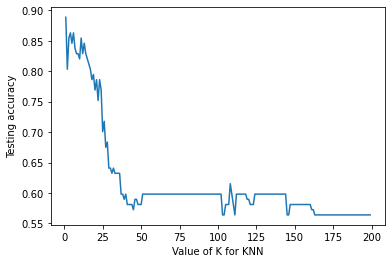

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list_binary)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

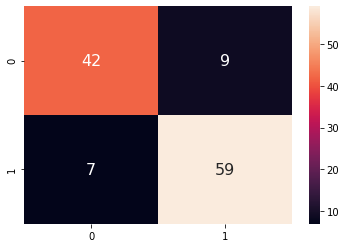

In [97]:
from sklearn.model_selection import cross_val_score
import seaborn as sn
knn_binary = KNeighborsClassifier(n_neighbors=7)
knn_binary.fit(X_train_binary, y_train_binary)
y_pred_binary=knn_binary.predict(X_test_binary)
sn.heatmap(confusion_matrix(y_test_binary, y_pred_binary), annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [98]:
# kNN with cross validation for binary data
scores_binary = cross_val_score(knn_binary, X, y_binary, cv=4, scoring='accuracy')
scores_binary

array([0.79591837, 0.90721649, 0.82474227, 0.87628866])

In [99]:
scores_binary.mean()

0.8510414475068379

# kNN for categorical classification

In [101]:
k_range = range(1,200)
scores_categorical = {}
scores_list_categorical = []
for k in k_range:
    print(f"Counting accuracy for {k} neighbours")
    knn_categorical = KNeighborsClassifier(n_neighbors=k)
    knn_categorical.fit(X_train_categorical, y_train_categorical)
    y_pred_categorical = knn_categorical.predict(X_test_categorical)
    scores_categorical[k] = metrics.accuracy_score(y_test_categorical, y_pred_categorical)
    scores_list_categorical.append(metrics.accuracy_score(y_test_categorical,y_pred_categorical))

Counting accuracy for 1 neighbours
Counting accuracy for 2 neighbours
Counting accuracy for 3 neighbours
Counting accuracy for 4 neighbours
Counting accuracy for 5 neighbours
Counting accuracy for 6 neighbours
Counting accuracy for 7 neighbours
Counting accuracy for 8 neighbours
Counting accuracy for 9 neighbours
Counting accuracy for 10 neighbours
Counting accuracy for 11 neighbours
Counting accuracy for 12 neighbours
Counting accuracy for 13 neighbours
Counting accuracy for 14 neighbours
Counting accuracy for 15 neighbours
Counting accuracy for 16 neighbours
Counting accuracy for 17 neighbours
Counting accuracy for 18 neighbours
Counting accuracy for 19 neighbours
Counting accuracy for 20 neighbours
Counting accuracy for 21 neighbours
Counting accuracy for 22 neighbours
Counting accuracy for 23 neighbours
Counting accuracy for 24 neighbours
Counting accuracy for 25 neighbours
Counting accuracy for 26 neighbours
Counting accuracy for 27 neighbours
Counting accuracy for 28 neighbours
C

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list_categorical)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

NameError: name 'scores_list_categorical' is not defined

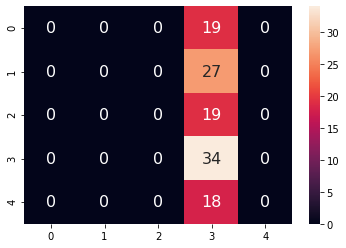

In [103]:
from sklearn.model_selection import cross_val_score
import seaborn as sn
knn_categorical = KNeighborsClassifier(n_neighbors=7)
knn_categorical.fit(X_train_categorical, y_train_categorical)
y_pred_binary=knn_categorical.predict(X_test_categorical)
sn.heatmap(confusion_matrix(y_test_categorical, y_pred_categorical), annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [104]:
# kNN with cross validation for categorical data
scores_categorical = cross_val_score(knn_categorical, X, y_categorical, cv=4, scoring='accuracy')
scores_categorical

array([0.28571429, 0.29896907, 0.27835052, 0.25773196])

In [105]:
scores_categorical.mean()

0.2801914580265096

In [106]:
# Decision trees

In [107]:
feature_cols = list(dataframe.columns.values)
feature_cols.remove('binary_rating')
feature_cols

['exclamation_count',
 'words_to_avoid_count',
 'smart_words_count',
 'h1_count',
 'h2_count',
 'div_count',
 'iframe_count',
 'a_count',
 'img_count',
 'span_count',
 'button_count',
 'input_count',
 'form_count',
 'script_count',
 'meta_count',
 'link_count',
 'style_count',
 'text_longer_than_50_characters_count',
 'text_longer_than_100_characters_count',
 'text_longer_than_150_characters_count',
 'text_longer_than_200_characters_count',
 'http_references',
 'https_references',
 'total_code_length',
 'p_count',
 'ylt_DOMelementsCount',
 'ylt_DOMelementMaxDepth',
 'ylt_scriptDuration',
 'ylt_jsErrors',
 'ylt_cssColors',
 'ylt_cssDuplicatedProperties',
 'ylt_totalWeight',
 'ylt_domains',
 'ylt_compression',
 'ylt_totalRequests',
 'ylt_heavyFonts',
 'ylt_global_score',
 'ylt_badJavascript_score',
 'ylt_jQuery_score',
 'ylt_serverConfig_score']

# Binary decision tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
clf_binary = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf_binary = clf_binary.fit(X_train_binary,y_train_binary)

#Predict the response for test dataset
y_pred_binary = clf_binary.predict(X_test_binary)

score_binary = metrics.accuracy_score(y_test_binary, y_pred_binary)
score_binary

0.9829059829059829

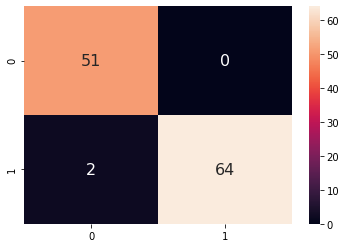

In [110]:
sn.heatmap(confusion_matrix(y_test_binary, y_pred_binary), annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [121]:
# Decision tree with cross validation
scores_binary = cross_val_score(clf_binary, X, y_binary, cv=5, scoring='accuracy')
scores_binary

array([1.        , 0.98717949, 0.98717949, 0.93589744, 0.96103896])

In [122]:
scores_binary.mean()

0.9742590742590742

In [113]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

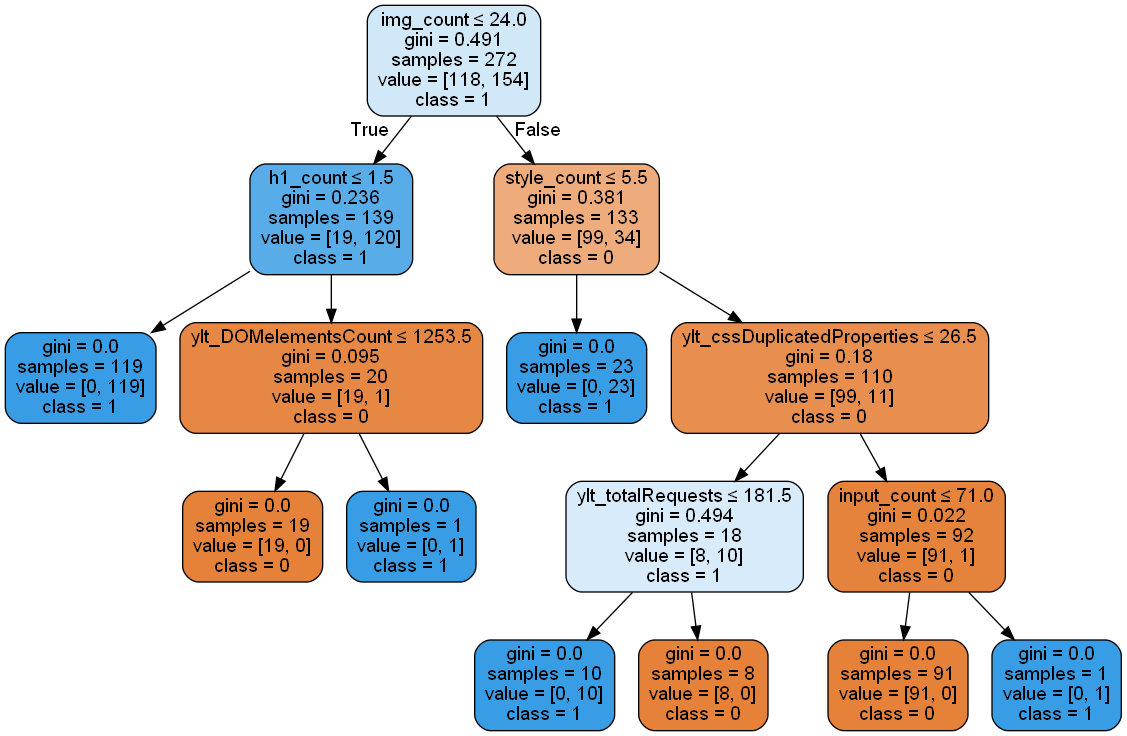

In [114]:
dot_data = StringIO()
export_graphviz(clf_binary, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_binary.png')
Image(graph.create_png())

# Categorical decision tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
clf_categorical = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf_categorical = clf_categorical.fit(X_train_categorical,y_train_categorical)

#Predict the response for test dataset
y_pred_categorical = clf_categorical.predict(X_test_categorical)

score_categorical = metrics.accuracy_score(y_test_categorical, y_pred_categorical)
score_categorical

0.27350427350427353

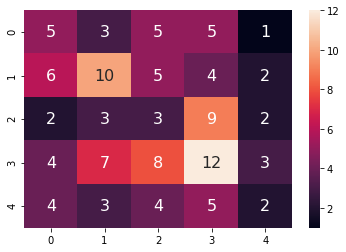

In [117]:
sn.heatmap(confusion_matrix(y_test_categorical, y_pred_categorical), annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [118]:
# Decision tree with cross validation
scores_categorical = cross_val_score(clf_categorical, X, y_categorical, cv=5, scoring='accuracy')
scores_categorical

array([0.20512821, 0.21794872, 0.29487179, 0.30769231, 0.20779221])

In [119]:
scores_categorical.mean()

0.2466866466866467